<a href="https://colab.research.google.com/github/dede-32/MKS/blob/main/PC_lab3_(1st_in_row).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents (Iris is flower😺):


In [37]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:8,:])
print(iris.target[0:9])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]]
[0 0 0 0 0 0 0 0 0]


Split data into training and testing parts:

In [48]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

print(X.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(150, 4)
(30, 4)
(120,)
(30,)


Use a Support Vector Machine for classification:


In [49]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
#print(SVMmodel.get_params())
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [50]:
X=iris.data[:,0:2]
#X, y = X[y<2], y[y<2]
X.shape

(150, 2)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

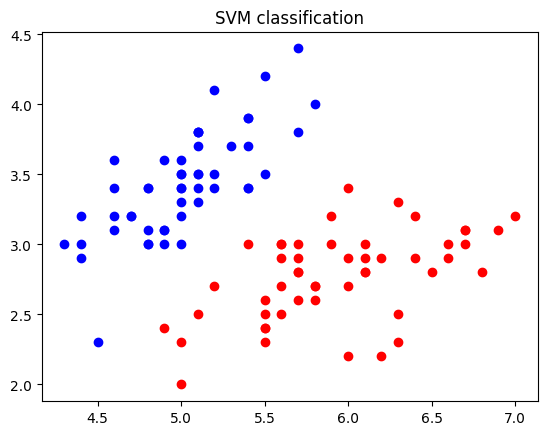

In [56]:
import matplotlib.pyplot as plt

plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')

#kdyby jsme meli 3d monitor slo by to videt
#plt.scatter(X[y==2,0],X[y==2,1],color='cyan')

plt.title("SVM classification")
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [79]:
X = iris.data[iris.target!=2,0:2]
print(X.shape)
y = iris.target[iris.target!=2]
SVMmodel_new = SVC(kernel='linear',C=200)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,y,test_size=0.2)
SVMmodel_new.fit(X_test_new,y_test_new)
SVMmodel_new.score(X_test_new,y_test_new)

(100, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.28324626 -5.14157457]]
[-17.44842634]


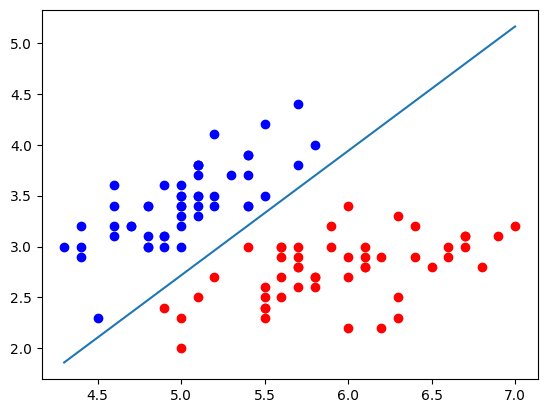

In [80]:
supvectors=SVMmodel.support_vectors_

#Separating line coefficients:
W=SVMmodel_new.coef_
b=SVMmodel_new.intercept_

print(W)
print(b)

import numpy as np
# min a max hodnota z x osy
x1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
# osa y
x2 = -b/W[0,1]-W[0,0]/W[0,1]*x1

# Plot the support vectors here
import matplotlib.pyplot as plt
plt.plot(x1,x2)
plt.scatter(X[y==0,0],X[y==0,1],color='blue')
plt.scatter(X[y==1,0],X[y==1,1],color='red')

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

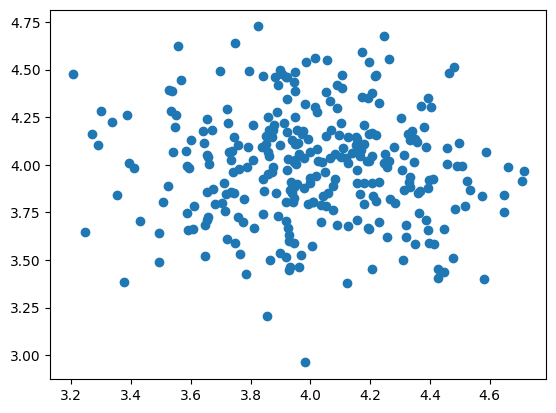

In [62]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

[4.01064234 4.00073014]


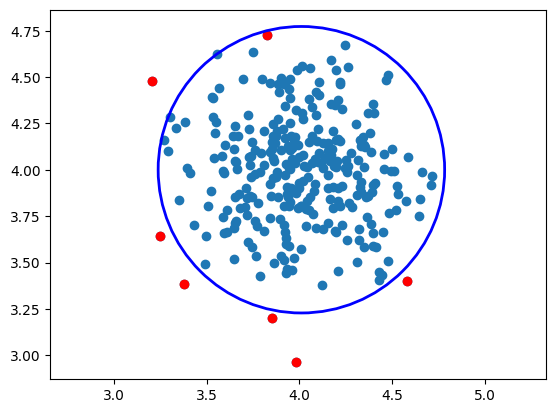

In [66]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

pred = SVMmodelOne.predict(x)
inlier_index = where(pred == 1)   # Inliers
outlier_index = where(pred == -1) # Outliers

inliers = x[inlier_index]
outliers = x[outlier_index]

center = np.mean(inliers, axis=0)
print(center)

radius = np.max(np.linalg.norm(inliers - center, axis=1))

plt.scatter(x[:, 0], x[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1], color='red')

circle = plt.Circle(center, radius, color='blue', fill=False, linewidth=2)
plt.gca().add_patch(circle)

plt.axis('equal')
plt.show()

Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.988560899145137


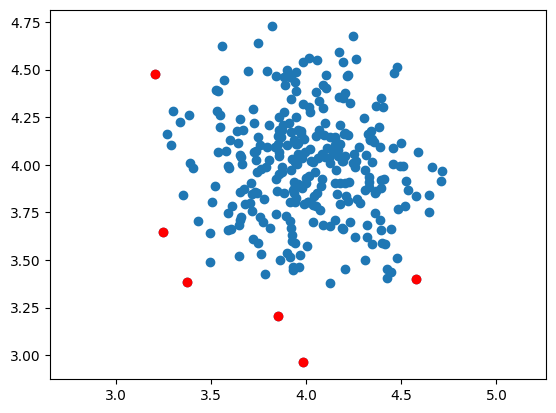

In [65]:
scores = SVMmodelOne.score_samples(x)

# najdi 5% nejvzdalenejsich bodu -> cervena
thresh = quantile(scores, 0.02)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()